In [1]:
import pandas as pd

### Load the under employee dataset

In [2]:
# read CSV file from the 'data' subdirectory using a relative path
df = pd.read_csv('../data/under_employee.csv')

# display the first 5 rows
df.head()

,YEAR,DISTRICT,AGE_CAT,GENDER,COUNT
0,2008,11,2,2,19068.939535
1,2008,11,1,1,3955.768322
2,2008,11,3,2,6390.099974
3,2008,12,2,2,21249.789837
4,2008,12,2,1,19070.490074


In [3]:
# display the last 5 rows
df.tail()

,YEAR,DISTRICT,AGE_CAT,GENDER,COUNT
844,2006,72,1,1,778.401835
845,2006,82,3,2,537.705497
846,2006,13,1,1,620.151662
847,2006,62,3,1,498.319106
848,2006,82,3,1,585.159785


In [4]:
# check the shape of the DataFrame (rows, columns)
df.shape

(849, 5)

### Data Preprocessing

#### 1. Replcaing empty cells with NaN(Not a number)

In [5]:
import numpy as np
df.replace(' ', np.nan, inplace=True)
df.head()

,YEAR,DISTRICT,AGE_CAT,GENDER,COUNT
0,2008,11,2,2,19068.939535
1,2008,11,1,1,3955.768322
2,2008,11,3,2,6390.099974
3,2008,12,2,2,21249.789837
4,2008,12,2,1,19070.490074


#### 2. Drop columns with NaN values 

In [6]:
df = df.dropna(axis=1, how='all')

#### NOTE: Best way to handle missing data

**Eliminating and Imputing** are two different strategies for handling samples or features with missing values.

Eliminating simply we remove the corresponding features (columns) or samples (rows) from the dataset entirely that have a certain number of missing values. The disadvantages for this strategy, we will run the risk of losing valuable information that our classifier needs to discriminate between classes.

Imputing we handle missing data by applying different interpolation techniques to estimate the missing values. One of the most common interpolation techniques is mean imputation, where we simply replace the missing value by the mean value of the entire feature column. A convenient way to achieve this is by using the Imputer class from scikit-learn, but filling missing values with this way is also a prediction which ignore the relation between missing values and other features.

Visualizing the important characteristics of a dataset is an important and recommended first step to clarifying the correlation between features to guide us to use a regression or another simple model to predict the values of missing variables. We have tried imputation here because we cannot loose data records.

#### 2. Imputation of missing values

##### i. Univariate vs. Multivariate Imputation

One type of imputation algorithm is univariate, which imputes values in the i-th feature dimension using only non-missing values in that feature dimension (e.g. impute.SimpleImputer). By contrast, multivariate imputation algorithms use the entire set of available feature dimensions to estimate the missing values (e.g. impute.IterativeImputer). As we can see we have to try multivariate imputation because it is the most sophisticated approach is to use. (***IterativeImputer class***)

In [7]:
from sklearn.impute import SimpleImputer
imp=SimpleImputer(missing_values=np.NaN)
idf=pd.DataFrame(imp.fit_transform(df))
idf.columns=df.columns
idf.index=df.index

In [8]:
idf.head()

,YEAR,DISTRICT,AGE_CAT,GENDER,COUNT
0,2008.0,11.0,2.0,2.0,19068.939535
1,2008.0,11.0,1.0,1.0,3955.768322
2,2008.0,11.0,3.0,2.0,6390.099974
3,2008.0,12.0,2.0,2.0,21249.789837
4,2008.0,12.0,2.0,1.0,19070.490074


## Encoding categorical features

### Label Encoding
And to convert this kind of categorical text data into model-understandable numerical data, we use the Label Encoder class. So all we have to do, to label encode the first column, is import the LabelEncoder class from the sklearn library, fit and transform the first column of the data, and then replace the existing text data with the new encoded data. Let’s have a look at the code.
But depending on the data, label encoding introduces a new problem. For example, we have encoded a set of country names into numerical data. This is actually categorical data and there is no relation, of any kind, between the rows.
The problem here is, since there are different numbers in the same column, the model will misunderstand the data to be in some kind of order, 0 < 1 < 2. But this isn’t the case at all. To overcome this problem, we use One Hot Encoder.
### One Hot Encoder
What one hot encoding does is, it takes a column which has categorical data, which has been label encoded, and then splits the column into multiple columns. The numbers are replaced by 1s and 0s, depending on which column has what value.

### One-hot encoding vs Dummy variables
By default, the get_dummies() does not do dummy encoding, but one-hot encoding. To produce an actual dummy encoding from your data, use drop_first=True. But here we need on hot encoding so we do not use that.

In [9]:
ydf = idf[['YEAR']]
ddf = pd.get_dummies(idf.DISTRICT,prefix=['DISTRICT'])
acdf = pd.get_dummies(idf.AGE_CAT,prefix=['AGE_CAT'])
gdf = pd.get_dummies(idf.GENDER,prefix=['GENDER'])
cdf = idf[['COUNT']]
frames = [ydf,ddf,acdf,gdf,cdf]
# print(gdf)

In [10]:
edf = pd.concat(frames, axis=1, sort=False)

In [11]:
edf.head()

,YEAR,['DISTRICT']_11.0,['DISTRICT']_12.0,['DISTRICT']_13.0,['DISTRICT']_21.0,['DISTRICT']_22.0,['DISTRICT']_23.0,['DISTRICT']_31.0,['DISTRICT']_32.0,['DISTRICT']_33.0,...,['DISTRICT']_82.0,['DISTRICT']_91.0,['DISTRICT']_92.0,['AGE_CAT']_1.0,['AGE_CAT']_2.0,['AGE_CAT']_3.0,['GENDER']_1.0,['GENDER']_1.4868735083532219,['GENDER']_2.0,COUNT
0,2008.0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,19068.939535
1,2008.0,1,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,1,0,0,3955.768322
2,2008.0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,6390.099974
3,2008.0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,21249.789837
4,2008.0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,1,0,1,0,0,19070.490074


In [12]:
edf.tail()

,YEAR,['DISTRICT']_11.0,['DISTRICT']_12.0,['DISTRICT']_13.0,['DISTRICT']_21.0,['DISTRICT']_22.0,['DISTRICT']_23.0,['DISTRICT']_31.0,['DISTRICT']_32.0,['DISTRICT']_33.0,...,['DISTRICT']_82.0,['DISTRICT']_91.0,['DISTRICT']_92.0,['AGE_CAT']_1.0,['AGE_CAT']_2.0,['AGE_CAT']_3.0,['GENDER']_1.0,['GENDER']_1.4868735083532219,['GENDER']_2.0,COUNT
844,2006.0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,1,0,0,778.401835
845,2006.0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,1,0,0,1,537.705497
846,2006.0,0,0,1,0,0,0,0,0,0,...,0,0,0,1,0,0,1,0,0,620.151662
847,2006.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,1,0,0,498.319106
848,2006.0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,1,1,0,0,585.159785


### Feature engineering

In [13]:
# NOTE: If the models are more accuarte we do not need to do a feature engineering

In [14]:
X = edf.drop(['COUNT'], axis=1)
y = edf['COUNT']

### Original data visualization

In [15]:
import seaborn as sns

# visualize the relationship between the features and the response using scatterplots
sns.pairplot(idf, x_vars='YEAR', y_vars='COUNT', height=10, kind='reg')

# Feature selection

#### Plotting original data with regression line

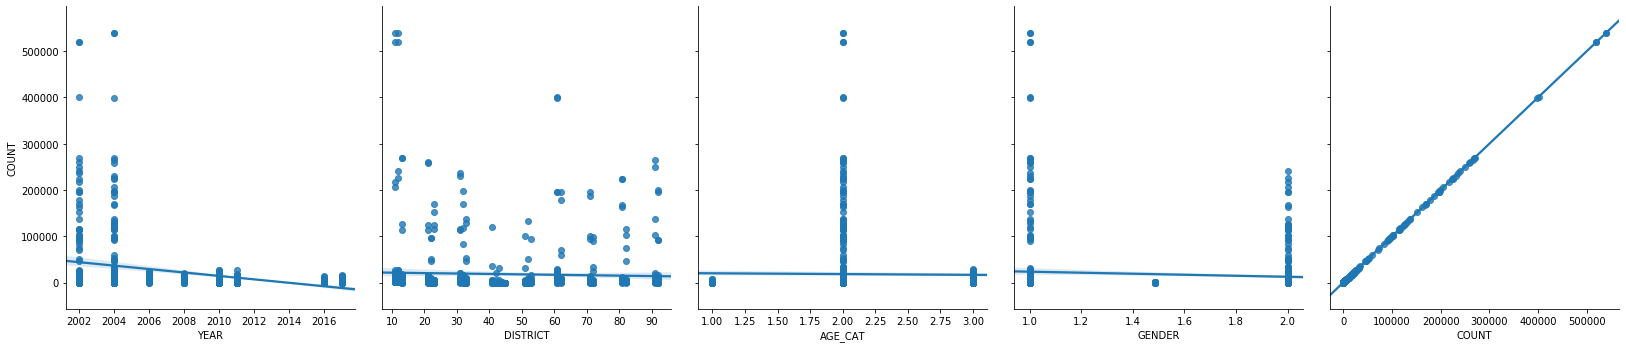

In [16]:
import seaborn as sns

# visualize the relationship between the features and the response using scatterplots
sns.pairplot(idf, x_vars=idf.columns, y_vars='COUNT', height=5, aspect=0.9, kind='reg')

Feature selection can be done in multiple ways but there are broadly 3 categories of it.
1. Filter Method
2. Wrapper Method
3. Embedded Method

(NOTE: 2 and 3 method are suited when lesser features (~20). Since there are more than 20 features we will use filter method.)

Reference link: https://towardsdatascience.com/feature-selection-with-pandas-e3690ad8504b

### 1. Filter Method
Plot the Pearson correlation heatmap and see the correlation of independent variables with the output variable. We will only select features which has correlation of above 0.5.

#### Pearson correlation heatmap

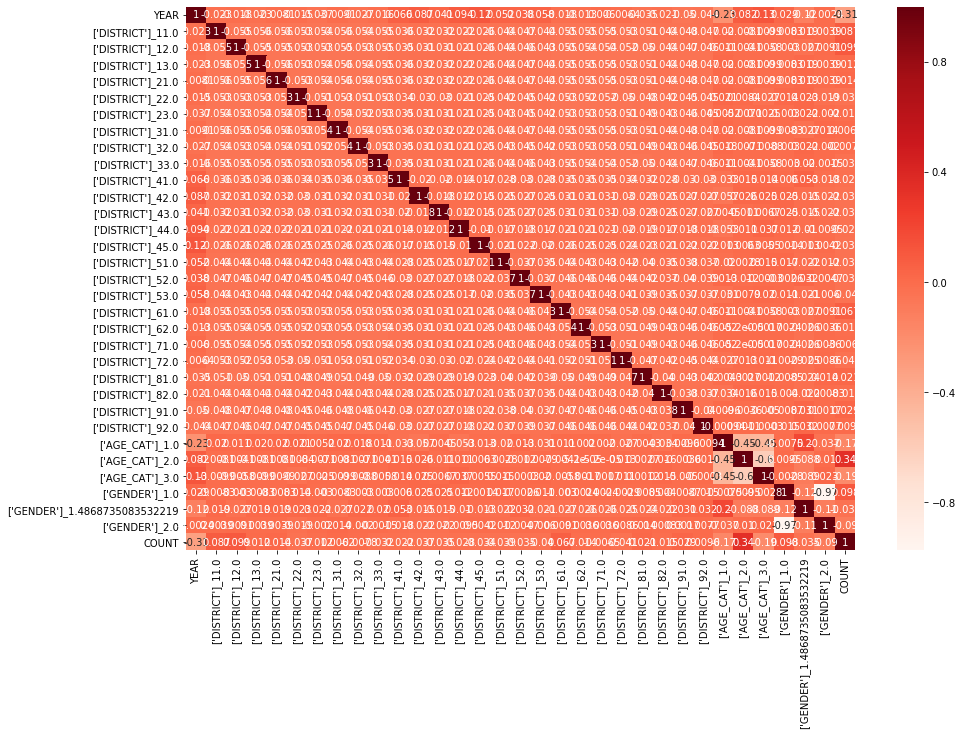

In [17]:
import matplotlib.pyplot as plt

#Using Pearson Correlation
plt.figure(figsize=(15,10))
cor = edf.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

#### Getting the selected features using correltion matrix

In [18]:
#Correlation with output variable
cor_target = abs(cor["COUNT"])#Selecting highly correlated features
selected_features_FM = cor_target[cor_target>=0.4]
selected_features_FM = list(selected_features_FM.keys())
selected_features_FM

['COUNT']

### 2. Wrapper Method
Feed the features to the selected Machine Learning algorithm and based on the model performance you add/remove the features. This is an iterative and computationally expensive process but it is more accurate than the filter method.

There are different wrapper methods such as Backward Elimination, Forward Selection, Bidirectional Elimination and RFE.

#### i. Backward Elimination
Check the performance of the model and then iteratively remove the worst performing features one by one till the overall performance of the model comes in acceptable range.

The performance metric used here to evaluate feature performance is pvalue. If the pvalue is above 0.05 then we remove the feature, else we keep it.

Here we are using OLS model which stands for “Ordinary Least Squares”. This model is used for performing linear regression.

In [19]:
import statsmodels.api as sm
#Backward Elimination
cols = list(X.columns)
pmax = 1
while (len(cols)>0):
    p= []
    X_1 = X[cols]
    X_1 = sm.add_constant(X_1)
    model = sm.OLS(y,X_1).fit()
    p = pd.Series(model.pvalues.values[1:],index = cols)      
    pmax = max(p)
    feature_with_p_max = p.idxmax()
    if(pmax>0.05):
        cols.remove(feature_with_p_max)
    else:
        break
selected_features_BE = cols
print(selected_features_BE)

['YEAR', "['DISTRICT']_11.0", "['DISTRICT']_12.0", "['DISTRICT']_13.0", "['DISTRICT']_21.0", "['DISTRICT']_22.0", "['DISTRICT']_23.0", "['DISTRICT']_31.0", "['DISTRICT']_32.0", "['DISTRICT']_33.0", "['DISTRICT']_41.0", "['DISTRICT']_42.0", "['DISTRICT']_43.0", "['DISTRICT']_44.0", "['DISTRICT']_45.0", "['DISTRICT']_51.0", "['DISTRICT']_52.0", "['DISTRICT']_53.0", "['DISTRICT']_61.0", "['DISTRICT']_62.0", "['DISTRICT']_71.0", "['DISTRICT']_72.0", "['DISTRICT']_81.0", "['DISTRICT']_82.0", "['DISTRICT']_91.0", "['DISTRICT']_92.0", "['AGE_CAT']_1.0", "['AGE_CAT']_2.0", "['AGE_CAT']_3.0", "['GENDER']_1.0", "['GENDER']_1.4868735083532219", "['GENDER']_2.0"]


/home/asitha/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


### 3. Embeded Method
Embedded methods are iterative in a sense that takes care of each iteration of the model training process and carefully extract those features which contribute the most to the training for a particular iteration. Regularization methods are the most commonly used embedded methods which penalize a feature given a coefficient threshold.

Here we will do feature selection using Lasso regularization. If the feature is irrelevant, lasso penalizes it’s coefficient and make it 0. Hence the features with coefficient = 0 are removed and the rest are taken.

Best alpha using built-in LassoCV: 269.435004
Best score using built-in LassoCV: 0.277161
Lasso picked 11 variables and eliminated the other 21 variables


/home/asitha/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


Text(0.5, 1.0, 'Feature importance using Lasso Model')

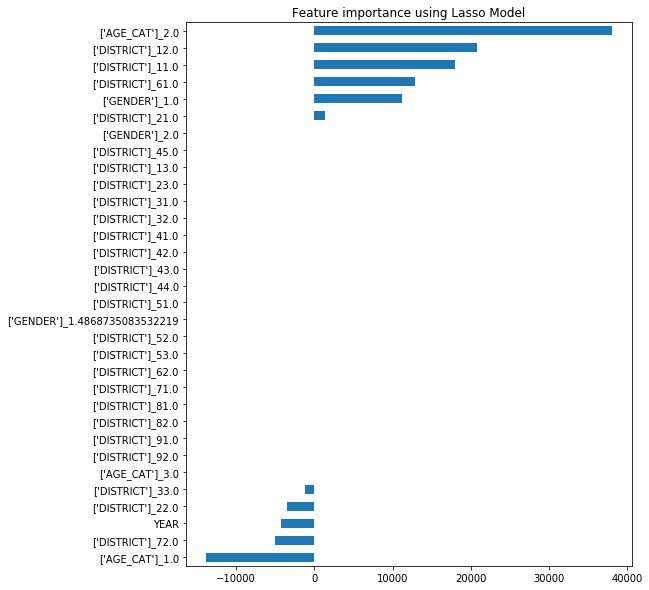

In [20]:
import matplotlib
from sklearn.linear_model import LassoCV

lassoReg = LassoCV()
lassoReg.fit(X, y)
print("Best alpha using built-in LassoCV: %f" % lassoReg.alpha_)
print("Best score using built-in LassoCV: %f" %lassoReg.score(X,y))
coef = pd.Series(lassoReg.coef_, index = X.columns)

print("Lasso picked " + str(sum(coef != 0)) + " variables and eliminated the other " +  str(sum(coef == 0)) + " variables")

imp_coef = coef.sort_values()
matplotlib.rcParams['figure.figsize'] = (8.0, 10.0)
imp_coef.plot(kind = "barh")
plt.title("Feature importance using Lasso Model")

### NOTE: Since there are not more than 20 feature we have used filter method. But filter method does not works with this dataset as we expected. So we have used backward eleimintaion. 

What are the features?
- **YEAR:**
- **GENDER:**
- **DISTRICT:** etc.

What is the response?
- **COUNT**

What else do we know?
- Because the response variable is continuous, this is a **regression** problem.

### Test the model with the subset of selected features and features that we need to check

In [21]:
# use the list to select a subset of the original DataFrame
# research_features = []
# X = edf[research_features]

#But we will feed the all the columns suggested by the feature selecting procudure.

# print the first 5 rows
X.head()

,YEAR,['DISTRICT']_11.0,['DISTRICT']_12.0,['DISTRICT']_13.0,['DISTRICT']_21.0,['DISTRICT']_22.0,['DISTRICT']_23.0,['DISTRICT']_31.0,['DISTRICT']_32.0,['DISTRICT']_33.0,...,['DISTRICT']_81.0,['DISTRICT']_82.0,['DISTRICT']_91.0,['DISTRICT']_92.0,['AGE_CAT']_1.0,['AGE_CAT']_2.0,['AGE_CAT']_3.0,['GENDER']_1.0,['GENDER']_1.4868735083532219,['GENDER']_2.0
0,2008.0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
1,2008.0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0
2,2008.0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
3,2008.0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
4,2008.0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0


In [22]:
# check the type and shape of X
print(type(X))
print(X.shape)

<class 'pandas.core.frame.DataFrame'>
(849, 32)


In [23]:
# select a Series from the DataFrame
y = idf['COUNT']

# print the first 5 values
y.head()

0    19068.939535
1     3955.768322
2     6390.099974
3    21249.789837
4    19070.490074
Name: COUNT, dtype: float64

In [24]:
# check the type and shape of y
print(type(y))
print(y.shape)

<class 'pandas.core.series.Series'>
(849,)


## Splitting X and y into training and testing sets

In [25]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1,test_size=0.1)

In [26]:
# Split is 90% for training and 10% for testing
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(764, 32)
(764,)
(85, 32)
(85,)


## Finding the best linear regression algorithm
#### Since this is extrapolating problem we can only use models which support extrapolate. Extrapoltaion means predicting out of sample test data

In [27]:
#import sklearn linear models
from sklearn.linear_model import LinearRegression, Ridge, RidgeCV,\
Lasso, ElasticNet, \
Lars, OrthogonalMatchingPursuit, BayesianRidge, ARDRegression, \
SGDRegressor, PassiveAggressiveRegressor, \
RANSACRegressor, HuberRegressor, LassoLars

from sklearn.ensemble import AdaBoostRegressor
from sklearn.cross_decomposition import PLSRegression
models = {'LinearRegression': LinearRegression(),
          'Ridge': Ridge(),
          'RidgeCV': RidgeCV(),
          'SGDRegressor': SGDRegressor(),
          'RANSACRegressor': RANSACRegressor(),
          'Lasso': Lasso(),
          'ElasticNet': ElasticNet(),
          'Lars': Lars(),
          'OrthogonalMatchingPursuit': OrthogonalMatchingPursuit(),
          'BayesianRidge': BayesianRidge(),
          'PassiveAggressiveRegressor': PassiveAggressiveRegressor(),
          'HuberRegressor': HuberRegressor(),
          'LassoLars': LassoLars(),
          'ARDRegression': ARDRegression(),
         }

## Model evaluation metrics for regression

Evaluation metrics for classification problems, such as **accuracy**, are not useful for regression problems. Instead, we need evaluation metrics designed for comparing continuous values.

Let's create some example numeric predictions, and calculate **three common evaluation metrics** for regression problems:

**Mean Absolute Error** (MAE) is the mean of the absolute value of the errors:

$$\frac 1n\sum_{i=1}^n|y_i-\hat{y}_i|$$

**Mean Squared Error** (MSE) is the mean of the squared errors:

$$\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2$$

**Root Mean Squared Error** (RMSE) is the square root of the mean of the squared errors:

$$\sqrt{\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2}$$

Comparing these metrics:

- **MAE** is the easiest to understand, because it's the average error.
- **MSE** is more popular than MAE, because MSE "punishes" larger errors.
- **RMSE** is even more popular than MSE, because RMSE is interpretable in the "y" units.

In [28]:
#Import non-sklearn packages
import numpy as np
import time
import warnings
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, explained_variance_score
from sklearn.model_selection import cross_val_score

warnings.filterwarnings("ignore")

print_coef = False

for key, model in models.items():
    begin = time.time()
    model.fit(X_train,y_train)
    print(key + ' Train time: ' + str((time.time() - begin)/60) + " minutes")
    preds = model.predict(X_test)
    mse = mean_squared_error(y_test,preds)
    mae = mean_absolute_error(y_test, preds)
    r2 = r2_score(y_test,preds)
    m_score = model.score(X_test,y_test)
    ex_va_score = explained_variance_score(y_test, preds)
    scores = cross_val_score(model, X_train, y_train, cv=5)
    print(key + ' MSE: ' + str(mse))
    print(key + ' R2 ' + str(r2))
    print(key + ' MAE ' + str(mae))
    print(key + ' Explained Variance Score ' + str(ex_va_score))
    print("Model score: %0.2f%s"%(m_score*100,'%'))
    print("Cross validation accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))
    if print_coef:
        print('Coefficients:')
        print(model.coef_)
    print('')

LinearRegression Train time: 7.978280385335286e-05 minutes
LinearRegression MSE: 1703842279.9654045
LinearRegression R2 0.22500367412442845
LinearRegression MAE 29266.817878417973
LinearRegression Explained Variance Score 0.24238901424700632
Model score: 22.50%
Cross validation accuracy: 0.23 (+/- 0.08)

Ridge Train time: 3.712177276611328e-05 minutes
Ridge MSE: 1695005303.0316105
Ridge R2 0.22902319209042044
Ridge MAE 29155.777049103148
Ridge Explained Variance Score 0.24622984441574003
Model score: 22.90%
Cross validation accuracy: 0.23 (+/- 0.07)

RidgeCV Train time: 4.6364466349283855e-05 minutes
RidgeCV MSE: 1639144475.3080864
RidgeCV R2 0.25443160973279655
RidgeCV MAE 28373.579661697226
RidgeCV Explained Variance Score 0.27055929219083263
Model score: 25.44%
Cross validation accuracy: 0.25 (+/- 0.08)

SGDRegressor Train time: 8.099873860677084e-05 minutes
SGDRegressor MSE: 5.588066569054678e+30
SGDRegressor R2 -2.541744098434639e+21
SGDRegressor MAE 2363903925934983.0
SGDRegresso

#### NOTE: We cannot achieve more than 50% accuary using those model.
## Polynomial interpolation
This shows that you can do non-linear regression with a linear model, using a pipeline to add non-linear features.

In [29]:
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.pipeline import Pipeline

for key, model in models.items():
    begin = time.time()
    model = Pipeline([('scale', StandardScaler()),('poly', PolynomialFeatures()), (key, model)])
    model.fit(X_train,y_train)
    print('Poly-' + key + ' Train time: ' + str((time.time() - begin)/60) + " minutes")
    preds = model.predict(X_test)
    mse = mean_squared_error(y_test,preds)
    mae = mean_absolute_error(y_test, preds)
    r2 = r2_score(y_test,preds)
    m_score = model.score(X_test,y_test)
    ex_va_score = explained_variance_score(y_test, preds)
    scores = cross_val_score(model, X_train, y_train, cv=5)
    print('Poly-' + key + ' MSE: ' + str(mse))
    print('Poly-' + key + ' R2 ' + str(r2))
    print('Poly-' + key + ' MAE ' + str(mae))
    print('Poly-' + key + ' Explained Variance Score ' + str(ex_va_score))
    print("Model score: %0.2f%s"%(m_score*100,'%'))
    print("Cross validation accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))
    if print_coef:
        print('Coefficients:')
        print(model.coef_)
    print('')

Poly-LinearRegression Train time: 0.001388553778330485 minutes
Poly-LinearRegression MSE: 1.5861224531272893e+33
Poly-LinearRegression R2 -7.214512094319884e+23
Poly-LinearRegression MAE 4319752788607961.0
Poly-LinearRegression Explained Variance Score -7.129635481445648e+23
Model score: -72145120943198840633163776.00%
Cross validation accuracy: -3801727501349323999805440.00 (+/- 9378488495210186779131904.00)

Poly-Ridge Train time: 0.000372016429901123 minutes
Poly-Ridge MSE: 1549999503.7223468
Poly-Ridge R2 0.2949793918025273
Poly-Ridge MAE 28901.620623459512
Poly-Ridge Explained Variance Score 0.29900297125441144
Model score: 29.50%
Cross validation accuracy: 0.50 (+/- 0.14)

Poly-RidgeCV Train time: 0.0018872936566670735 minutes
Poly-RidgeCV MSE: 1534342790.8131123
Poly-RidgeCV R2 0.30210088134567437
Poly-RidgeCV MAE 28663.150803666023
Poly-RidgeCV Explained Variance Score 0.3059841922832034
Model score: 30.21%
Cross validation accuracy: 0.51 (+/- 0.14)

Poly-SGDRegressor Train tim

### NOTE: We can see that accuary increased and MAE and R2 redused

In [34]:
begin = time.time()
best_model = Pipeline([('scale', StandardScaler()),('poly', PolynomialFeatures()), ('ll', LassoLars())])
best_model_name = 'Poly-LassoLars'
best_model.fit(X_train,y_train)
print(best_model_name + ' Train time: ' + str((time.time() - begin)/60) + " minutes")
preds = best_model.predict(X_test)
mse = mean_squared_error(y_test,preds)
r2 = r2_score(y_test,preds)
m_score = best_model.score(X_test,y_test)
ex_va_score = explained_variance_score(y_test, preds)
scores = cross_val_score(best_model, X_train, y_train, cv=5)
print(best_model_name + ' MSE: ' + str(mse))
print(best_model_name + ' R2 ' + str(r2))
print(best_model_name + ' MAE ' + str(mae))
print(best_model_name + ' Explained Variance Score ' + str(ex_va_score))
print("Model score: %0.2f%s"%(m_score*100,'%'))
print("Cross validation accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Poly-LassoLars Train time: 0.0006879806518554687 minutes
Poly-LassoLars MSE: 1100598635.7372737
Poly-LassoLars R2 0.4993903432321374
Poly-LassoLars MAE 26744.11233822555
Poly-LassoLars Explained Variance Score 0.5063734166381678
Model score: 49.94%
Cross validation accuracy: 0.53 (+/- 0.18)


In [35]:
import pickle
# save the model to disk
filename = '../models/under_employee.sav'
pickle.dump(best_model, open(filename, 'wb'))